# 1b. Aproximacion a la funcion polinomial 1+2x+4x^3

In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam 

from matplotlib import pyplot as plt 
import numpy as np 
import math

In [2]:
#EDO de primera clase
class ODEsolver(Sequential): 
    def __init__(self, **kwargs): 
        super().__init__(**kwargs) #usamos el init de la clase Sequential
        self.loss_tracker = keras.metrics.Mean(name="loss") #funcion de costo
    
    @property 
    def metrics(self):
        return [self.loss_tracker]
    
    def train_step(self, data): #paso de entrenamiento
        
        batch_size = tf.shape(data)[0]
        
        #vector de numeros aleatorios
        x = tf.random.uniform((batch_size, 1), minval = -2, maxval = 2)
        
        
        #GradientTape es la funcion que calcula derivadas
        with tf.GradientTape() as tape:
            with tf.GradientTape() as tape2:
                tape2.watch(x) #vigila todas las operaciones que se hacen con la variable x
                y_pred = self(x, training = True) #evalua la derivada de cada valor de x
            
            dy = tape2.gradient(y_pred, x)
            
            #vectores de ceros
            x_o = tf.zeros((batch_size, 1))
            y_o = self(x_o, training = True)

            #funcion de costo, es la ecuacion diferencial x dy/dx + y = x^2 cos(x)
            eq = x* dy +y_pred - x*x*tf.cos(x)
            
            #initial condition, y(0) = 1
            ic = y_o -0.
            #queremos que el error sea 0 
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic) 
    
    #como cambia la funcion de costo, por ende, el loss, si cambian las trainable_variables (asi se llaman, ya estan definidas en la clase Sequential)
    #gradientes
        grads =tape.gradient(loss, self.trainable_variables)
    
    #muevete en direccion contraria a los gradientes, tiene como argumento el gradiente y su correspondiente variable
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
    
    #guarda un historial de la perdida de la funcion de costo
        self.loss_tracker.update_state(loss)
    
    #imprime el historial de la funcion de costo 
        return  {"loss": self.loss_tracker.result()}
    

            

In [3]:
model = ODEsolver()

model.add(Dense(20, activation = "tanh", input_shape = (1, ) ))
model.add(Dense(10, activation = "tanh"))
model.add(Dense(1, activation ="linear"))


model.summary()
model.compile(optimizer =RMSprop(), metrics = ["loss"])


Model: "od_esolver"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                40        
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [4]:
x = tf.linspace(-1, 1, 100) 
history = model.fit(x, epochs = 1000, verbose =1) 

#dominio 
x_testv = tf.linspace(-1, 1, 100)

a = model.predict(x_testv)


Epoch 1/1000
4/4 [==============================] - 1s 2ms/step - loss: 0.2663
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2266
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2187
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2400
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1765
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2105
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2338
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2411
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2617
Epoch 10/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2390
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2053
Epoch 12/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2380
Epoch 13/1000
4/4 [==============================

4/4 [==============================] - 0s 3ms/step - loss: 0.1550
Epoch 104/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1392
Epoch 105/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1564
Epoch 106/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2014
Epoch 107/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1502
Epoch 108/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1471
Epoch 109/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1316
Epoch 110/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1138
Epoch 111/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1262
Epoch 112/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2002
Epoch 113/1000
4/4 [==============================] - 0s 997us/step - loss: 0.1342
Epoch 114/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1364
Epoch 115/1000
4/4 [=====================

Epoch 204/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0395
Epoch 205/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0336
Epoch 206/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0737
Epoch 207/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0521
Epoch 208/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0547
Epoch 209/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0536
Epoch 210/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 211/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0423
Epoch 212/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 213/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 214/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 215/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0449
Epoch 216/1000
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 305/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 306/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 307/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 308/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 309/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 310/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 311/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0071
Epoch 312/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 313/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 314/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 315/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0054
Epoch 316/1000
4/4 [===================

4/4 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 405/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 406/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 407/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 408/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 409/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 410/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 411/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 412/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 413/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 414/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 415/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 416/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 505/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 506/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 507/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 508/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 509/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 510/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 511/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 512/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0028
Epoch 513/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 514/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 515/1000
4/4 [==============================] - 0s 1ms/step - loss: 4.5673e-04
Epoch 516/1000
4/4 [=================

4/4 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 604/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 605/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 606/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 607/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.8806e-04
Epoch 608/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 610/1000
4/4 [==============================] - 0s 996us/step - loss: 0.0016
Epoch 611/1000
4/4 [==============================] - 0s 1ms/step - loss: 6.0608e-04
Epoch 612/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 613/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 614/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.6712e-04
Epoch 615/1000
4/4 [=========

4/4 [==============================] - 0s 2ms/step - loss: 5.9482e-04
Epoch 703/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.5863e-04
Epoch 704/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 705/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 706/1000
4/4 [==============================] - 0s 1ms/step - loss: 8.6752e-04
Epoch 707/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.8267e-04
Epoch 708/1000
4/4 [==============================] - 0s 1ms/step - loss: 9.8132e-04
Epoch 709/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 710/1000
4/4 [==============================] - 0s 1ms/step - loss: 9.5902e-04
Epoch 711/1000
4/4 [==============================] - 0s 998us/step - loss: 0.0015
Epoch 712/1000
4/4 [==============================] - 0s 2ms/step - loss: 9.2342e-04
Epoch 713/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 714/100

4/4 [==============================] - 0s 1ms/step - loss: 3.9350e-04
Epoch 801/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0034
Epoch 802/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.0430e-04
Epoch 803/1000
4/4 [==============================] - 0s 1ms/step - loss: 7.4287e-04
Epoch 804/1000
4/4 [==============================] - 0s 2ms/step - loss: 9.3271e-04
Epoch 805/1000
4/4 [==============================] - 0s 1ms/step - loss: 5.5858e-04
Epoch 806/1000
4/4 [==============================] - 0s 998us/step - loss: 7.2495e-04
Epoch 807/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 808/1000
4/4 [==============================] - 0s 998us/step - loss: 8.5471e-04
Epoch 809/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0015
Epoch 810/1000
4/4 [==============================] - 0s 997us/step - loss: 6.3859e-04
Epoch 811/1000
4/4 [==============================] - 0s 1ms/step - loss: 4.7357e-

4/4 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 899/1000
4/4 [==============================] - 0s 1ms/step - loss: 4.4121e-04
Epoch 900/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.0481e-04
Epoch 901/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0012
Epoch 902/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 903/1000
4/4 [==============================] - 0s 998us/step - loss: 2.9394e-04
Epoch 904/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 905/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0025
Epoch 906/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.9818e-04
Epoch 907/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1066e-04
Epoch 908/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.7185e-04
Epoch 909/1000
4/4 [==============================] - 0s 1ms/step - loss: 7.5835e-04
Epoch 910

Epoch 996/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.1848e-04
Epoch 997/1000
4/4 [==============================] - 0s 997us/step - loss: 1.9603e-04
Epoch 998/1000
4/4 [==============================] - 0s 997us/step - loss: 6.4095e-04
Epoch 999/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1000/1000
4/4 [==============================] - 0s 998us/step


In [ ]:
#model.save("rna_edo_solver1")

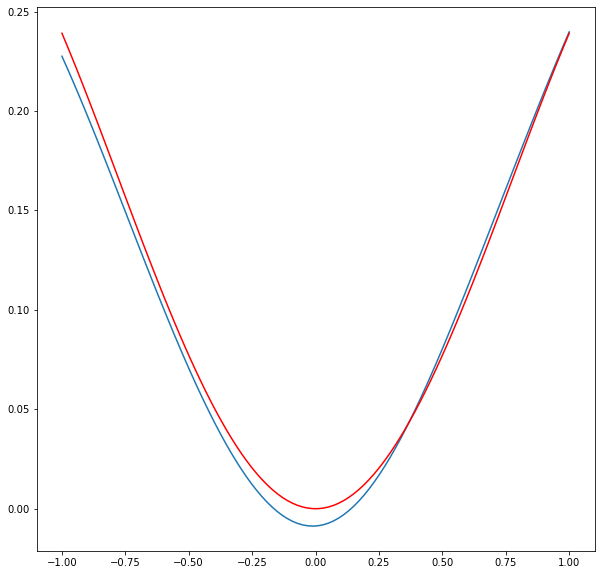

In [6]:
plt.figure(figsize = (10,10))

plt.plot(x_testv, a)

#comparamos la solucion numerica dada por la RNA con la solucion analitica
plt.plot(x_testv, x*np.sin(x) -2.*(-x*np.cos(x)+ np.sin(x))/x, color = "red")

plt.show()
